In [55]:
import networkx as nx
import numpy as np
from scipy.io import mmread
from scipy.linalg import sqrtm, inv
import matplotlib.pyplot as plt

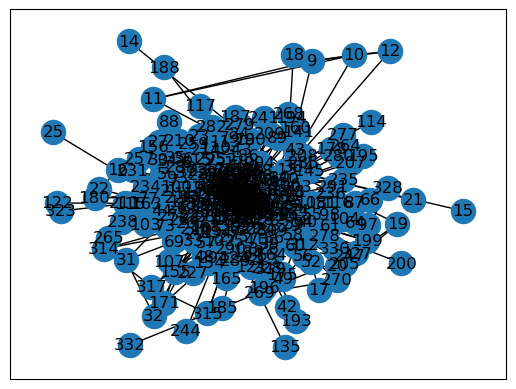

In [56]:
G = G=nx.read_weighted_edgelist("C:/Users/bartb/OneDrive/Documents/Uni/2AMS30 - Network Statistics for Data Science/2AMS30---G7/inf-USAir97.mtx")
nx.draw_networkx(G)

In [57]:
weights_dictlist = [d for (u, v, d) in G.edges(data=True)]
weights = [list(d.values())[0] for d in weights_dictlist]
print(max(weights), min(weights))

0.5326 0.0009


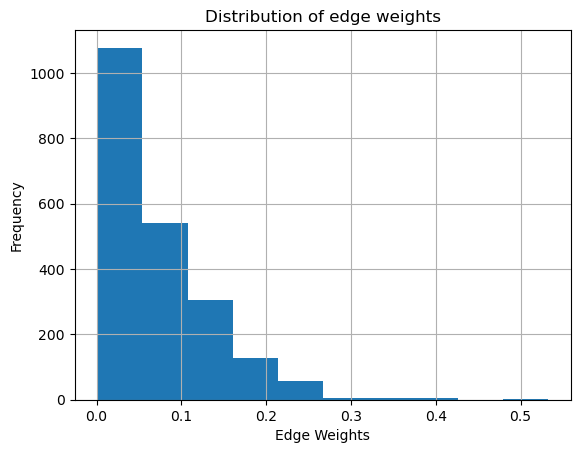

In [58]:
plt.hist(weights);
plt.title('Distribution of edge weights')
plt.xlabel('Edge Weights')
plt.ylabel('Frequency')
plt.grid()

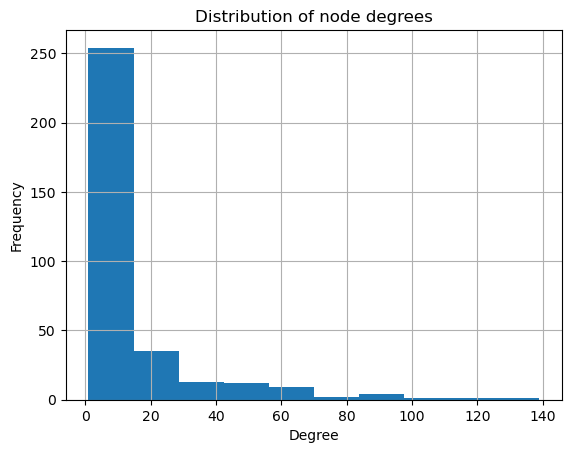

In [59]:
degree_sequence = [G.degree(n) for n in list(G.nodes())]
plt.hist(degree_sequence);
plt.title('Distribution of node degrees')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid()

C:\Users\bartb\AppData\Local\Temp\ipykernel_27404\3795878165.py:4: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.14.0.
  M = L.asfptype()


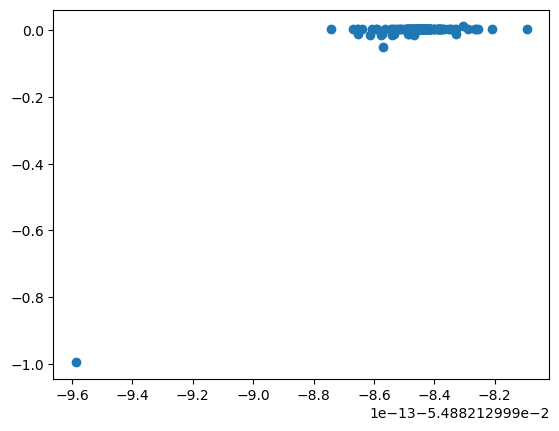

In [60]:
from scipy.sparse.linalg import eigs

L = nx.laplacian_matrix(G)
M = L.asfptype()
vals, vecs = eigs(M,4,which='SR')

X = np.real(vecs)
fig = plt.figure()
plt.scatter(X[:,0],X[:,1])

1. Create degree matrix D, weighted adjacency matrix A, and laplacian matrix L = D - A
2. Create either symmetrical laplacian or random walk laplacian
- $L_{rw} = D^{-1}L$
- $L_{sym} = D^{-1/2}LD^{-1/2}$
3. Compute eigenvalues and eigenvectors
4. Decide on number of clusters
5. Find communities using clustering algorithm (k-means, for example)

In [61]:
n_nodes = len(list(G.nodes()))
D = np.zeros((n_nodes, n_nodes))
for index, node in enumerate(list(G.nodes())):
    D[index, index] = G.degree(node)

A = nx.to_numpy_array(G, weight='weight')

L = D - A

## Random Walk Laplacian

In [62]:
## compute random walk laplacian
D_inv = np.linalg.inv(D)
L_rw = D_inv @ L

[0.9011347655412834, 0.9316708881339195, 0.9398387836180973, 0.9538318565029353, 0.9593877235591542, 0.9632009311344801, 0.9689630318681115, 0.9732509835710893, 0.9738592606781626, 0.977000431526109, 0.978324049333513, 0.9798459666666715, 0.9805952547009454, 0.9809991228041371, 0.9815847619416886, 0.9822644743441699, 0.982402584511616, 0.9833173659142386, 0.9835413348090201, 0.9838908529860714, 0.9840792530545482, 0.9846845658348466, 0.9853858867878299, 0.9860584206235695, 0.9864046002387946, 0.9869120298087348, 0.9876052533075537, 0.9883390616200959, 0.9884244295941527, 0.988766516543807, 0.9890479805693088, 0.9891496580762384, 0.9893389915927998, 0.989754176564466, 0.9899259174188396, 0.9903354258239939, 0.9907483507476333, 0.9907926732160444, 0.9911210094280662, 0.9913844210848624, 0.9915543320872963, 0.9919323461930257, 0.9920940663620041, 0.9924622275009911, 0.9926085086618851, 0.9931431530667332, 0.9931812765422372, 0.9937095325137233, 0.9938009721264376, 0.9941188014340113, 0.99

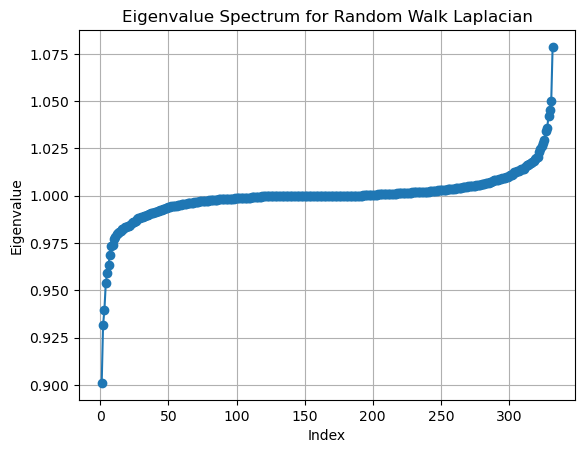

In [63]:
# find eigenvalues and vectors
values, vectors = np.linalg.eig(L_rw)
values = sorted(values)
print(sorted(values))

plt.figure()
plt.grid()
plt.plot(range(1, len(values) + 1), values, marker='o')
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue Spectrum for Random Walk Laplacian")
plt.show()

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = vectors[:, :10]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=99)
    kmeans.fit(X_scaled)
    variances.append(kmeans.inertia_)

print(variances)

[3320.0, 2803.5647407795095, 2043.3024833569539, 1557.8240114313287, 1488.2283665001482, 1362.7951713129753, 1060.3950835091669, 692.2122625046983, 638.3837167670097, 577.6653929081278]


c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

Text(0.5, 1.0, 'Intertia for different numbers of clusters')

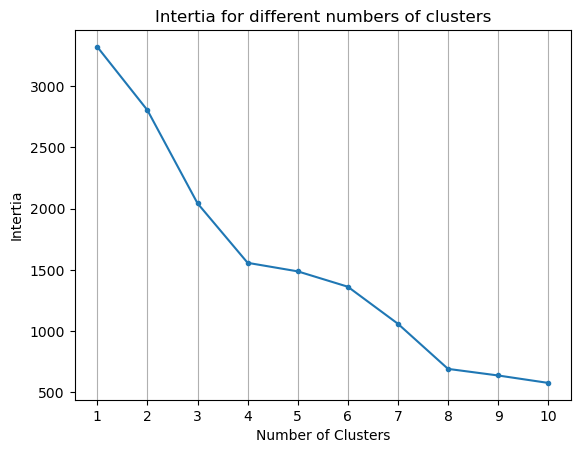

In [65]:
plt.figure()
plt.grid(axis='x', which='major')

plt.plot(range(1,11), variances, marker='.')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.title('Intertia for different numbers of clusters')


Judging by the change of slope after 5 clusters, 5 clusters seems to be a good guess for the optimal number.

c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[3 3 0 0 3 3 0 0 0 3 0 0 3 0 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 1 0]


c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


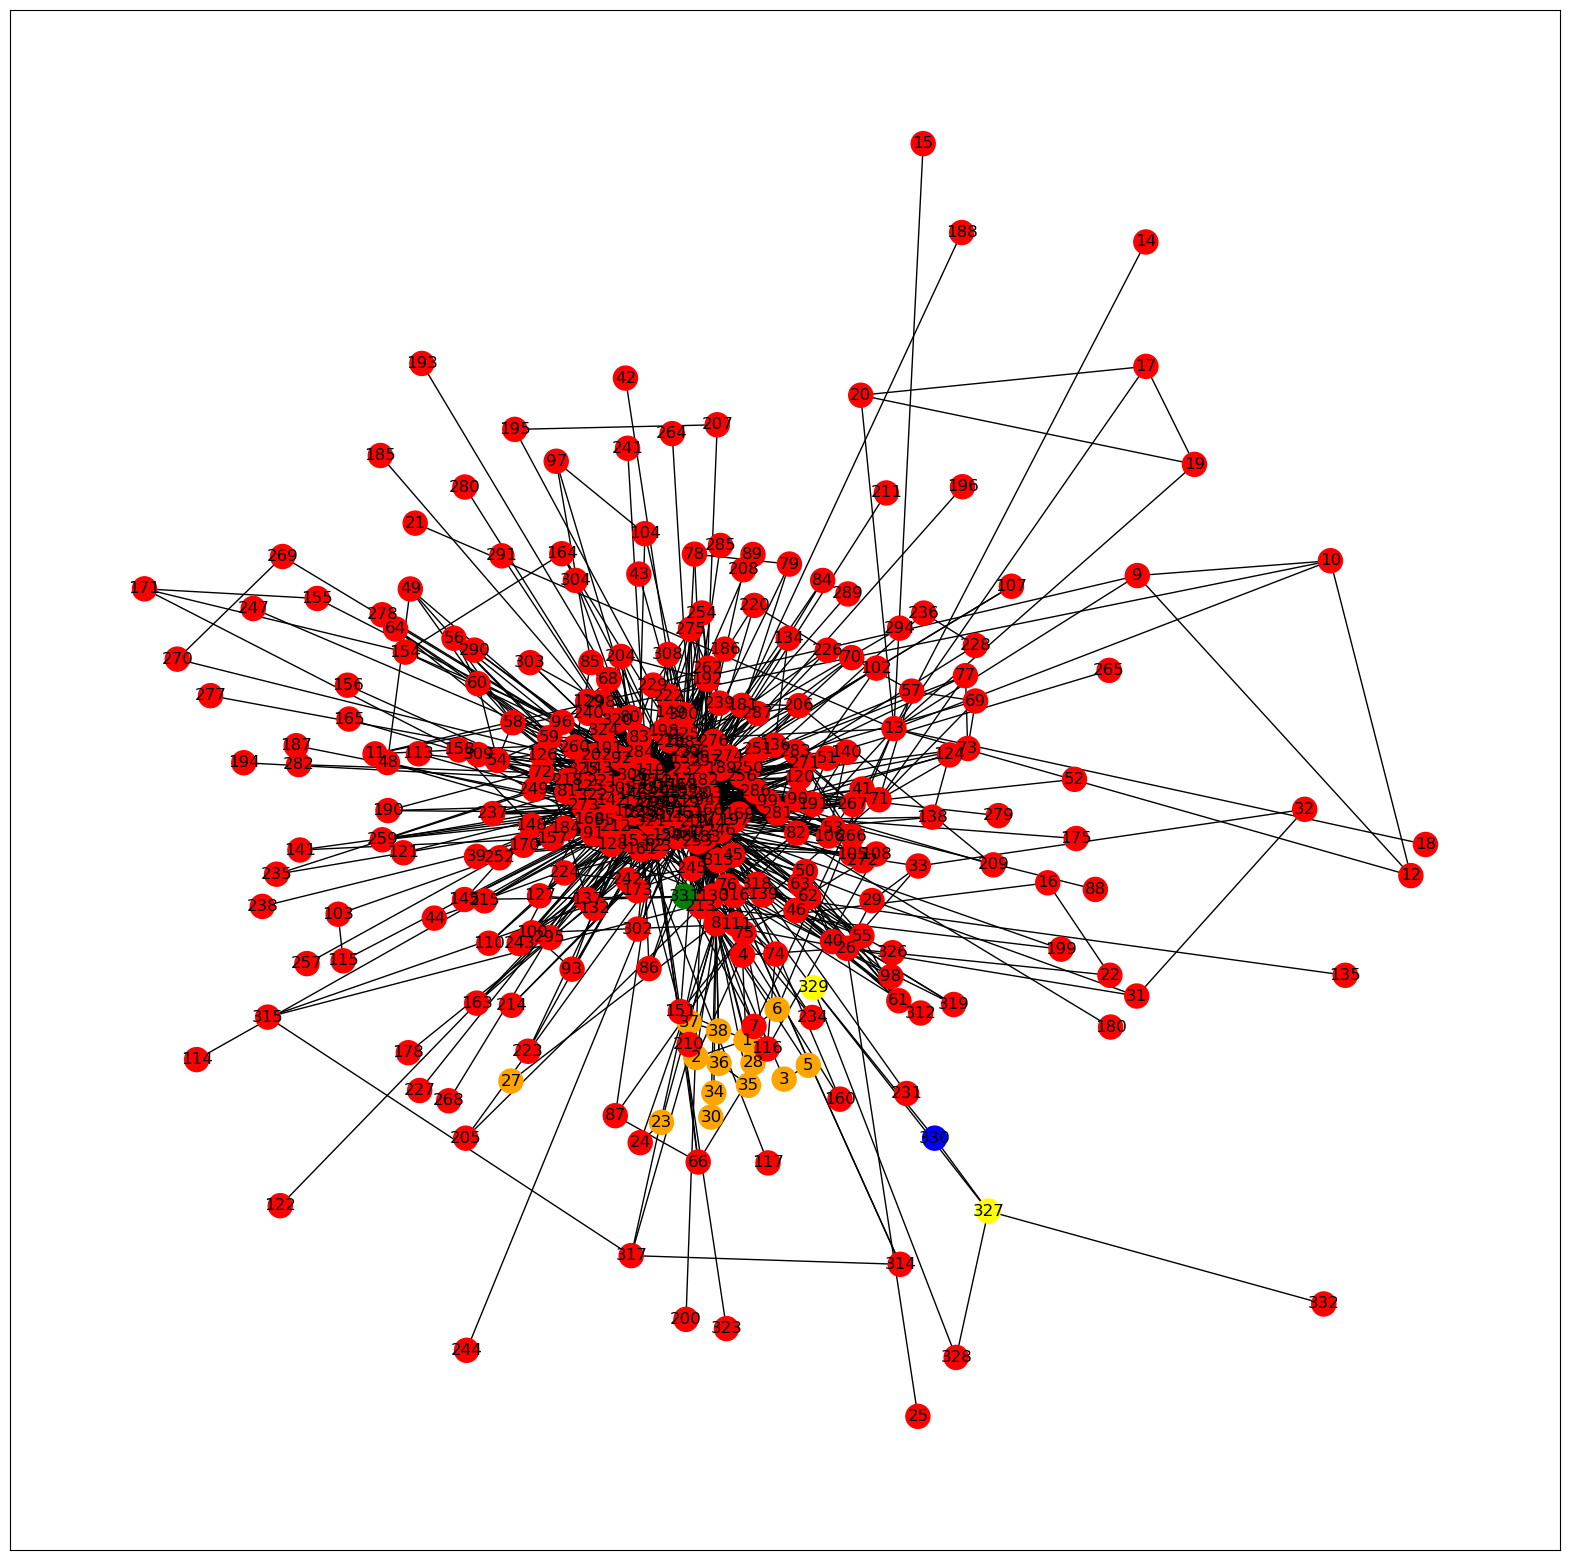

In [66]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

kmeans4 = KMeans(n_clusters=5, n_init=100, random_state=99)
kmeans4.fit(X_scaled)
labels = kmeans4.labels_
print(labels)

color_map = []
colors = ['red', 'blue', 'green', 'orange', 'yellow']  
for label in labels:
    color_map.append(colors[label])

plt.figure(figsize=(20,20));
nx.draw_networkx(G, node_color=color_map, cmap=plt.cm.jet, pos=nx.spring_layout(G))


In [67]:
indices = [i for i, x in enumerate(labels) if x == 0]
red = [list(G.nodes())[i] for i in indices]

indices = [i for i, x in enumerate(labels) if x == 1]
blue = [list(G.nodes())[i] for i in indices]

indices = [i for i, x in enumerate(labels) if x == 2]
green = [list(G.nodes())[i] for i in indices]

indices = [i for i, x in enumerate(labels) if x == 3]
orange = [list(G.nodes())[i] for i in indices]

indices = [i for i, x in enumerate(labels) if x == 4]
yellow = [list(G.nodes())[i] for i in indices]

In [68]:
print(orange)

['2', '1', '5', '3', '6', '23', '27', '28', '30', '34', '35', '36', '37', '38']


The orange cluster consists of almost exclusively airports in Alaska/Hawaii

In [69]:
print(blue)

['330']


The Blue Cluster consists of only one aiport on Palau, a tiny island nation in Oceania, to the east of the Phillippines.

In [70]:
print(green)

['331']


Similar to blue, green the green cluster has only one airport, on Pago Pago, American Samoa, deep into the pacific (east of Fiji)

In [71]:
print(yellow)

['329', '327']


The yellow cluster contains two airports, also in Oceania: Guam and Saipan. Far into the pacific at the height of the Phillippines.

In [72]:
G_reduced = G.copy()
G_reduced.remove_nodes_from(blue)
G_reduced.remove_nodes_from(green)
G_reduced.remove_nodes_from(yellow)
G_reduced.remove_nodes_from(orange)

# remove node 332 and 328 to make it a connected graph again
G_reduced.remove_nodes_from(['332', '328'])
print(nx.is_connected(G_reduced))

# the graph is connected again. Let's now compute the RW laplacian

True


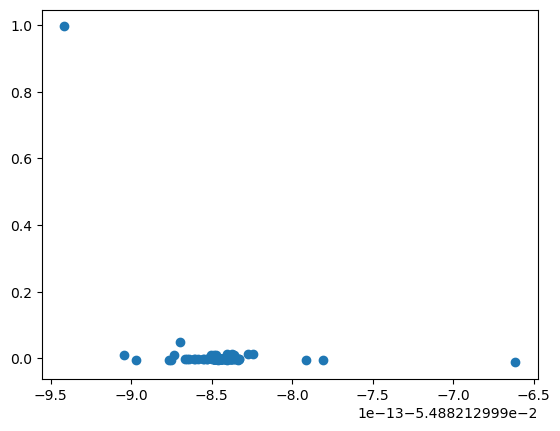

In [73]:
n_nodes = len(list(G_reduced.nodes()))
D = np.zeros((n_nodes, n_nodes))
for index, node in enumerate(list(G_reduced.nodes())):
    D[index, index] = G_reduced.degree(node)

A = nx.to_numpy_array(G_reduced, weight='weight')

L = D - A
vals, vecs = eigs(M,5,which='SR')

X = np.real(vecs)
fig = plt.figure()
plt.scatter(X[:,0],X[:,1])

In [82]:
## compute random walk laplacian
D_inv = np.linalg.inv(D)
L_rw = D_inv @ L

values, vectors = np.linalg.eig(L_rw)

c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

Text(0.5, 1.0, 'Intertia for different numbers of clusters')

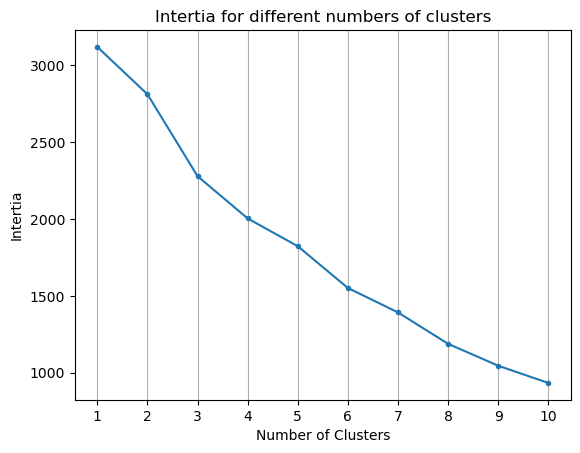

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

vectors = np.real(vectors)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled[:, :10]
variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=99)
    kmeans.fit(X_scaled)
    variances.append(kmeans.inertia_)

plt.figure()
plt.grid(axis='x', which='major')

plt.plot(range(1,11), variances, marker='.')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.title('Intertia for different numbers of clusters')


c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 3 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]


c:\Users\bartb\anaconda3\envs\2AMS30\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


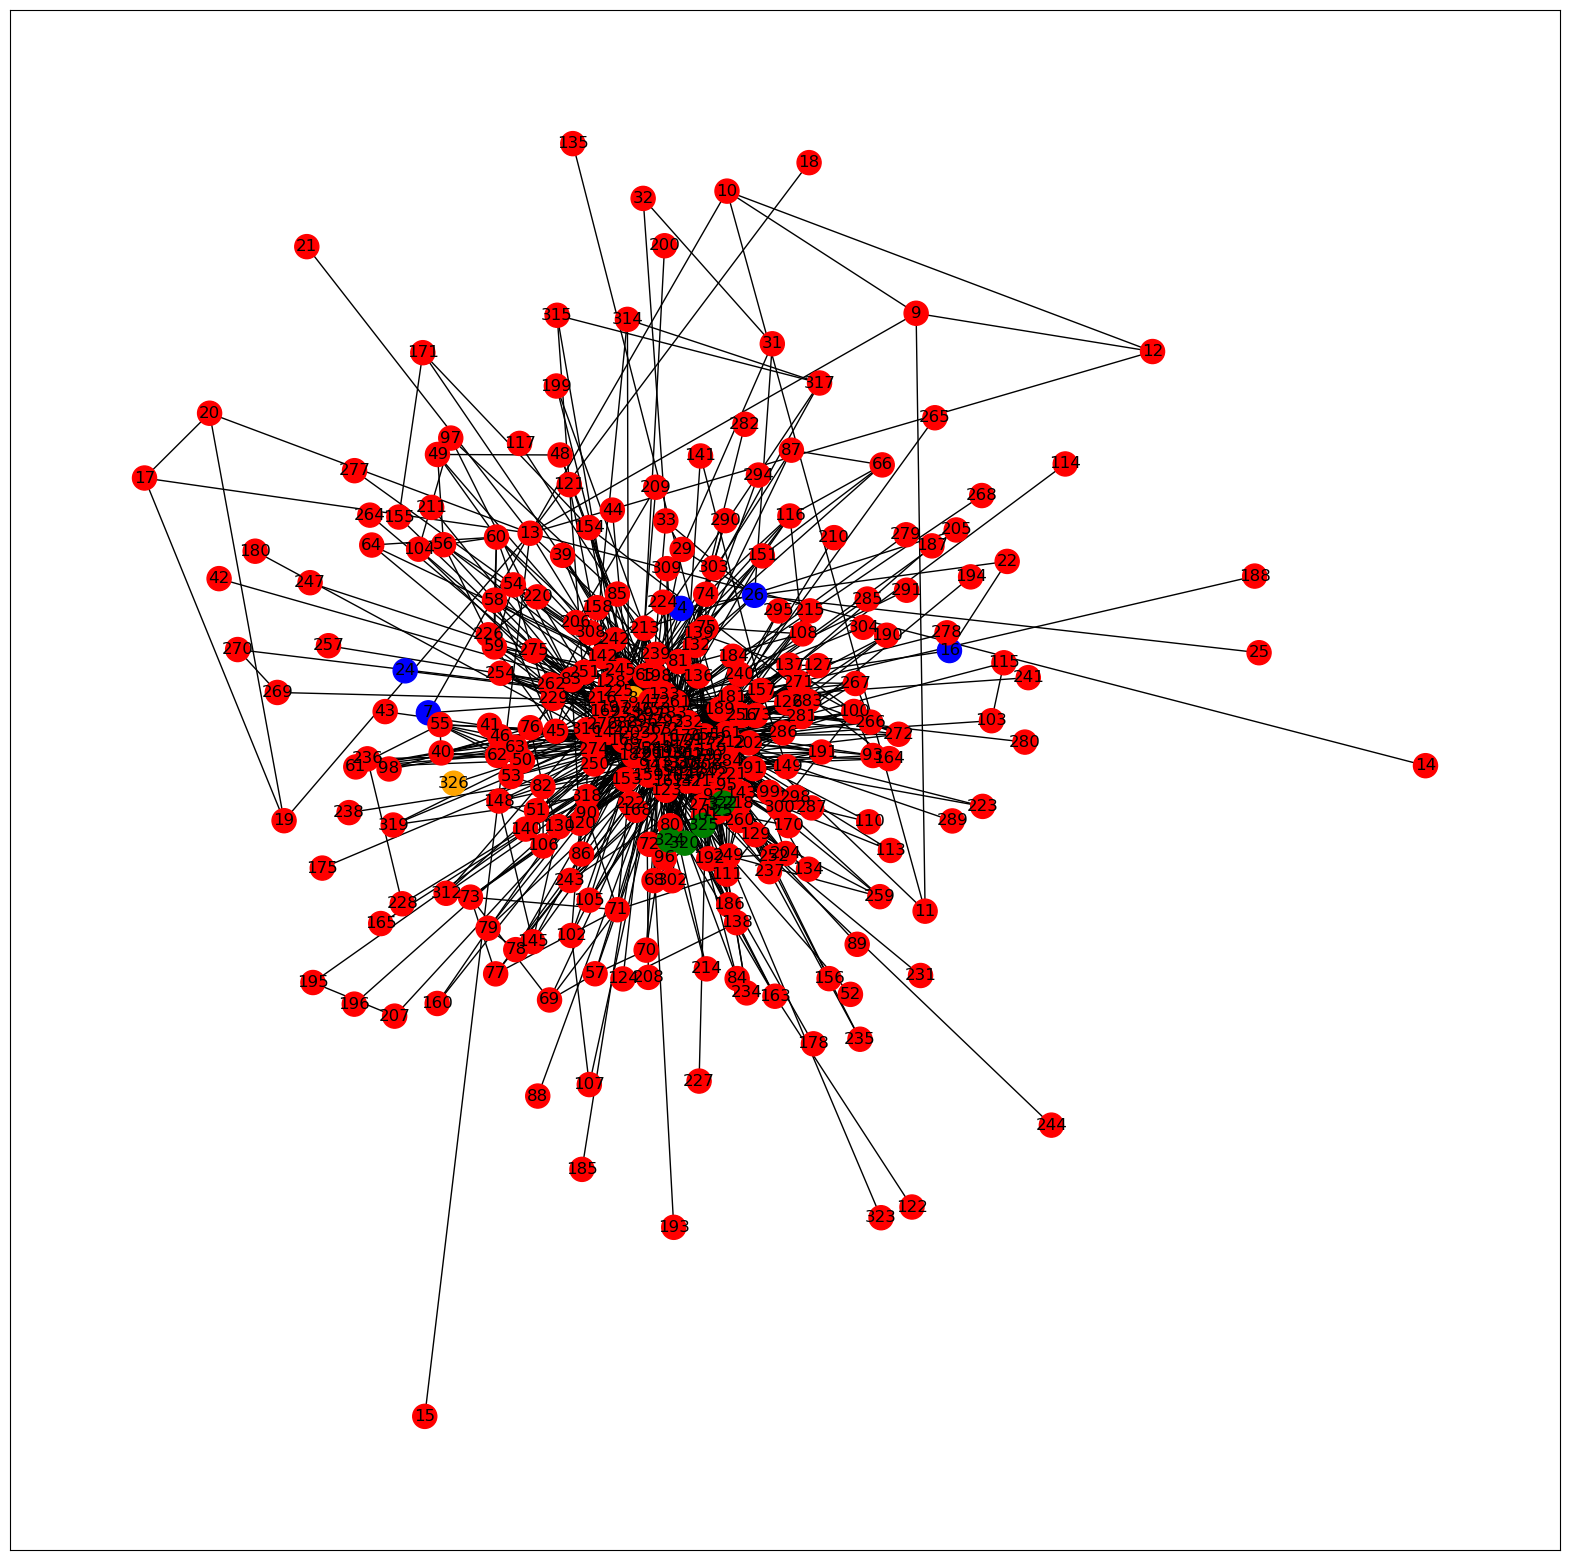

In [89]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

kmeans4 = KMeans(n_clusters=4, n_init=100, random_state=99)
kmeans4.fit(X_scaled)
labels = kmeans4.labels_
print(labels)

color_map = []
colors = ['red', 'blue', 'green', 'orange']  
for label in labels:
    color_map.append(colors[label])

plt.figure(figsize=(20,20));
nx.draw_networkx(G_reduced, node_color=color_map, cmap=plt.cm.jet, pos=nx.spring_layout(G_reduced))


In [90]:
indices = [i for i, x in enumerate(labels) if x == 0]
red2 = [list(G_reduced.nodes())[i] for i in indices]

indices = [i for i, x in enumerate(labels) if x == 1]
blue2 = [list(G_reduced.nodes())[i] for i in indices]

indices = [i for i, x in enumerate(labels) if x == 2]
green2 = [list(G_reduced.nodes())[i] for i in indices]

indices = [i for i, x in enumerate(labels) if x == 3]
orange2 = [list(G_reduced.nodes())[i] for i in indices]

In [91]:
print(blue2)

['4', '26', '7', '16', '24', '313']


Again, Alaska

In [92]:
print(green2)

['320', '322', '324', '325']


Carribean (puerto rico, USVI)

In [93]:
print(orange2)

['8', '326']


Central pacific and alaska?